# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

## Definir hipótesis

H_0: No hay diferencia en la pérdida de peso promedio entre las dos dietas.

H_1: Hay diferencia en la pérdida de peso promedio entre las dos dietas.

alpha = 0,05

In [39]:
from scipy import stats
from scipy.stats import levene
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

diet_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

In [40]:
# Comprobar si es una distribuición normal
alpha = 0.05
pvalue_1 = stats.shapiro(diet_1)[1]
pvalue_2 = stats.shapiro(diet_2)[1]
print('Diet 1 - P-value:', pvalue_1)
print('Diet 1 - P-value:', pvalue_2)

# Evaluación
if pvalue_1 > alpha and pvalue_2 > alpha:
    print('Los datos provienen de una distribución normal')
else:
    print('Los datos no provienen de una distribuición normal')

Diet 1 - P-value: 0.9635409177367069
Diet 1 - P-value: 0.5905246580529597
Los datos provienen de una distribución normal


In [41]:
# Comprobar la vazianza con Levene
pvalue_var = levene(diet_1, diet_2)[1]
print('Varianza:', pvalue_var)

# Evaluación
if pvalue_var < alpha:
    print('Las varianzas son diferentes')
    equal_var = False
else:
    print('Las varianzas son iguales')
    equal_var = True

Varianza: 0.15767770055358
Las varianzas son iguales


In [42]:
# Prueba T de Student
pvalue = stats.ttest_ind(diet_1, diet_2, equal_var=True)[1]
print(pvalue)

#Evaluación
if pvalue < alpha:
    print('Se rechaza H0: hay una diferencia significativa en la pérdida de peso entre las dos dietas.')
else:
    print('No se rechaza HO: no hay diferencia significativa en la pérdida de peso entre las dos dietas.')

0.004083270191713912
Se rechaza H0: hay una diferencia significativa en la pérdida de peso entre las dos dietas.


In [43]:
# Promedio de pérdida de peso 
media_diet_1 = np.mean(diet_1)
media_diet_2 = np.mean(diet_2)
print(f'Promedio dieta 1: {media_diet_1:.2f} kg')
print(f'Promedio dieta 2: {media_diet_2:.2f} kg')

# Diferencia percentual
diferencia_pct = ((media_diet_2 - media_diet_1) / media_diet_1) * 100
print(f'Diferencia porcentual: {diferencia_pct:.2f}%')

Promedio dieta 1: 2.54 kg
Promedio dieta 2: 3.03 kg
Diferencia porcentual: 19.10%


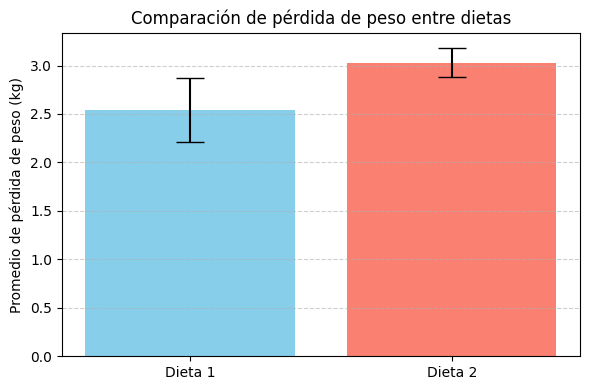

In [44]:
# Grafico de comparación del promedio

# Promedio y desviación estándar
medias = (media_diet_1, media_diet_2)
stds = [np.std(diet_1, ddof=1), np.std(diet_2, ddof=1)] # ddof = 1 para desviación muestral

#Grafico de barras
plt.figure(figsize=(6, 4))
labels = ['Dieta 1', 'Dieta 2']
plt.bar(labels, medias, yerr=stds, capsize=10, color=['skyblue', 'salmon'])
plt.ylabel('Promedio de pérdida de peso (kg)')
plt.title('Comparación de pérdida de peso entre dietas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusión
Con base en los datos analizados y en la prueba de hipótesis realizada, se concluye que existen evidencias estadísticas significativas que indican una diferencia en la pérdida de peso promedio entre las dos dietas evaluadas.

En particular, la Dieta 2 demostró ser aproximadamente un 19,10 % más efectiva que la Dieta 1 en términos de reducción de peso promedio.


## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

## Hipótesis
H0 = No hay diferencia significativa en el rendimiento promedio del maíz entre los tres fertilizantes.

H1 = Al menos uno de los fertilizantes presenta un rendimiento promedio significativamente diferente de los demás.

In [45]:
# Muestras
fertilizante_1= [20, 21, 20, 19, 20]
fertilizante_2 = [22, 21, 23, 22, 21]
fertilizante_3 = [24, 23, 22, 23, 24]

In [46]:
# Comprobar si es una distribuición normal
alpha = 0.05
pvalue_fert_1 = stats.shapiro(fertilizante_1)[1]
pvalue_fert_2 = stats.shapiro(fertilizante_2)[1]
pvalue_fert_3 = stats.shapiro(fertilizante_3)[1]
print('Fertilizante 1 - P-value:', pvalue_fert_1)
print('Fertilizante 2 - P-value:', pvalue_fert_2)
print('Fertilizante 3 - P-value:', pvalue_fert_3)

# Evaluación
if pvalue_fert_1 > alpha and pvalue_fert_2 > alpha and pvalue_fert_3 > alpha:
    print('Los datos provienen de una distribuición normal (no se rechaza H0)')
else:
    print('Los datos no provienen de una distribuición normal (Se rechaza H0)')

Fertilizante 1 - P-value: 0.32542950716414576
Fertilizante 2 - P-value: 0.3140395561440371
Fertilizante 3 - P-value: 0.3140395561440371
Los datos provienen de una distribuición normal (no se rechaza H0)


In [47]:
# Comprobar la vazianza con Levene
pvalue_var_fert = levene(fertilizante_1, fertilizante_2, fertilizante_3)[1]
print('Varianza:', pvalue_var_fert)

# Evaluación
if pvalue_var_fert < alpha:
    print('Las varianzas son diferentes (se rechaza H0)')
    equal_var = False
else:
    print('Las varianzas son iguales (no se rechaza H0)')
    equal_var = True

Varianza: 0.8039599174006208
Las varianzas son iguales (no se rechaza H0)


In [48]:
# Prueba con ANOVA (one way)
alpha = 0.05
p_valor = stats.f_oneway(fertilizante_1, fertilizante_2, fertilizante_3)[1]
print(p_valor)

# Evaluación
if p_valor < alpha: 
    print('Se rechaza H0: hay diferencia significativa entre al menos dos fertilizantes')
else:
    print('No se rechaza HO: no hay diferencia significativa entre los fertilizantes')

0.00014047824793190472
Se rechaza H0: hay diferencia significativa entre al menos dos fertilizantes


In [49]:
# Promedio del rendimiento de los fertilizantes
media_1 = np.mean(fertilizante_1)
media_2 = np.mean(fertilizante_2)
media_3 = np.mean(fertilizante_3)

print(f"Media Fertilizante 1: {media_1}")
print(f"Media Fertilizante 2: {media_2}")
print(f"Media Fertilizante 3: {media_3}")

Media Fertilizante 1: 20.0
Media Fertilizante 2: 21.8
Media Fertilizante 3: 23.2


In [50]:
# Preparar los datos para la prueba post hoc de Tukey
rendimientos = fertilizante_1 + fertilizante_2 + fertilizante_3 # combina todos los valores en una lista
grupos = ['Fertilizante 1']*len(fertilizante_1) + ['Fertilizante 2']*len(fertilizante_2) + ['Fertilizante 3']*len(fertilizante_3)

# Crear DataFrame
df = pd.DataFrame({'Rendimiento': rendimientos, 'Fertilizante': grupos})
df

,Rendimiento,Fertilizante
0,20,Fertilizante 1
1,21,Fertilizante 1
2,20,Fertilizante 1
3,19,Fertilizante 1
4,20,Fertilizante 1
5,22,Fertilizante 2
6,21,Fertilizante 2
7,23,Fertilizante 2
8,22,Fertilizante 2
9,21,Fertilizante 2


In [52]:
# Hacer la prueba post hoc de Tukey
prueba_tukey = pairwise_tukeyhsd(endog=df['Rendimiento'], groups=df['Fertilizante'], alpha=0.05)
print(prueba_tukey.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower  upper  reject
------------------------------------------------------------------
Fertilizante 1 Fertilizante 2      1.8 0.0099 0.4572 3.1428   True
Fertilizante 1 Fertilizante 3      3.2 0.0001 1.8572 4.5428   True
Fertilizante 2 Fertilizante 3      1.4 0.0409 0.0572 2.7428   True
------------------------------------------------------------------


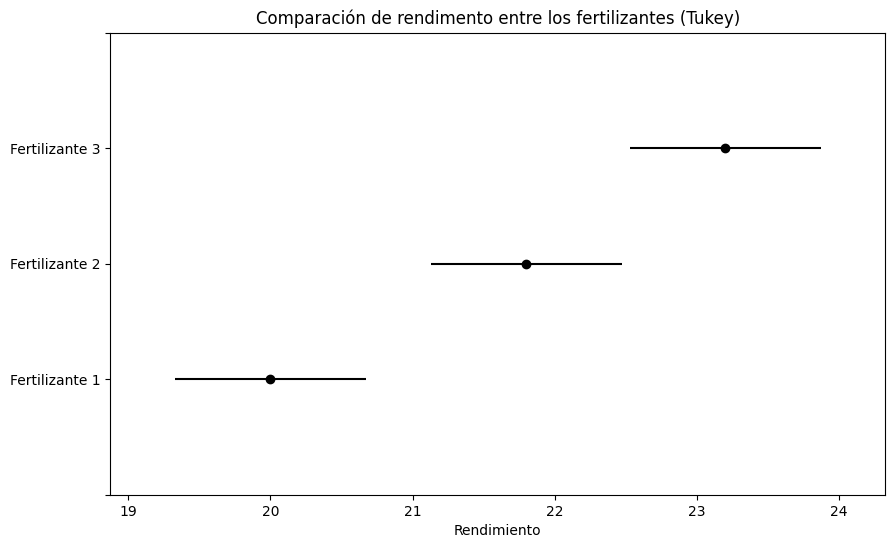

In [56]:
# Gráfico de Tukey
prueba_tukey.plot_simultaneous()
plt.title('Comparación de rendimento entre los fertilizantes (Tukey)')
plt.xlabel('Rendimiento')
plt.show()

## Conclusión

La prueba ANOVA y la prueba de Tukey indicaron que el tipo de fertilizante influye significativamente en el rendimiento del maíz. **El fertilizante 3 se presenta como la mejor opción entre los tres evaluados**, ya que supera de manera significativa a los demás en términos de rendimiento. Por otro lado, el fertilizante 1 mostró el promedio de rendimiento más bajo. 